# Chat Intents

## K-mean clustering

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans

In [3]:
data_sample = pd.read_csv('data/processed/data_sample.csv')
data_sample.head()

,Unnamed: 0,text,category,cleaned_text
0,1024,I'm worried my card might be lost in the mail? How long does it usually take to arrive?,card_delivery_estimate,im worried card might lost mail long usually take arrive
1,9405,I got charged a fee that shouldn't be there from my cash,cash_withdrawal_charge,got charged fee shouldnt cash
2,9368,Do you charge for making a withdrawal? I took some money out of my account earlier and I was charged for this.,cash_withdrawal_charge,charge making withdrawal took money account earlier charged
3,3414,Is there an issue with my account? I don't see a cheque deposit that I made yesterday. Please assist.,balance_not_updated_after_cheque_or_cash_deposit,issue account dont see cheque deposit made yesterday please assist
4,7402,Are there ways for other people to send me money?,receiving_money,way people send money


In [4]:
X = data_sample['cleaned_text']
X.head()

0              im worried card might lost mail long usually take arrive
1                                         got charged fee shouldnt cash
2           charge making withdrawal took money account earlier charged
3    issue account dont see cheque deposit made yesterday please assist
4                                                 way people send money
Name: cleaned_text, dtype: object

In [6]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_transformed_vector = tfidf_vectorizer.fit_transform(X)
tfidf_transformed_vector.shape

(1000, 809)

In [9]:
k = 10
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(tfidf_transformed_vector)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [10]:
len(kmeans.labels_)

1000

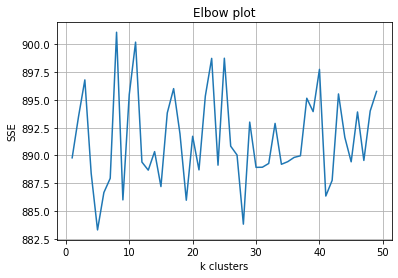

In [11]:
sse = []

for K in range(1, 50):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(tfidf_transformed_vector)
    sse.append(kmeans.inertia_)

x = range(1,50)
y = sse

fig, ax = plt. subplots()
ax.plot(x, y)

ax.set(xlabel = 'k clusters', ylabel = 'SSE',
       title = 'Elbow plot')
ax.grid()

plt.show()